In [40]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy.integrate as spi
from scipy.integrate import trapezoid, simpson, romberg, quad


# Laboratorio 06: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Ros Anthony Miranda D'Angelo
*Métodos computacionales 2024-II*

---

#1

Usando los métodos trapezoidal, Simpson y cuadratura encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [39]:


# I1 = ∫(0 a π/2) (1 / sqrt(tan(x))) dx
def f1(x):
    return 1 / np.sqrt(np.tan(x))

# I2 = ∫(1 a ∞) (cos(x) / x^3) dx
def f2(x):
    return np.cos(x) / x**3

# I3 = ∫(0 a π/4) ∫(0 a sin(x)) (1 / sqrt(1 - y^2)) dy dx
def f3(y, x):
    return 1 / np.sqrt(1 - y**2)

# Parámetros del error y número inicial de puntos
error_tol = 1e-5
N = 1000

# Método del Trapecio
def trapecio(f, a, b, N):
    x = np.linspace(a, b, N)
    h = (b - a) / (N - 1)
    return (h / 2) * (f(a) + 2 * np.sum(f(x[1:-1])) + f(b))

#  Método de Simpson
def simpson(f, a, b, N):
    if N % 2 == 1:  # Simpson requiere N par
        N += 1
    x = np.linspace(a, b, N)
    h = (b - a) / (N - 1)
    return (h / 3) * (f(a) + 4 * np.sum(f(x[1:-1:2])) + 2 * np.sum(f(x[2:-2:2])) + f(b))

#evaluar primers Is

#I1
I1_trap = trapecio(f1, 0, np.pi/2, N)
I1_simp = simpson(f1, 0, np.pi/2, N)
I1_quad, err1 = spi.quad(f1, 0, np.pi/2, epsabs=error_tol)

#I2
I2_trap = trapecio(f2, 1, 10, N)  # Se usa 10 como límite superior aproximado
I2_simp = simpson(f2, 1, 10, N)
I2_quad, err2 = spi.quad(f2, 1, np.inf, epsabs=error_tol)


#resultados
print(f"Integral I1 (Método del Trapecio): {I1_trap:.6f}")
print(f"Integral I1 (Método de Simpson): {I1_simp:.6f}")
print(f"Integral I1 (Cuadratura Adaptativa): {I1_quad:.6f} con error estimado {err1:.2e}")

print(f"\nIntegral I2 (Método del Trapecio): {I2_trap:.6f}")
print(f"Integral I2 (Método de Simpson): {I2_simp:.6f}")
print(f"Integral I2 (Cuadratura Adaptativa): {I2_quad:.6f} con error estimado {err2:.2e}")


Integral I1 (Método del Trapecio): inf
Integral I1 (Método de Simpson): inf
Integral I1 (Cuadratura Adaptativa): 2.221441 con error estimado 4.86e-06

Integral I2 (Método del Trapecio): 0.017857
Integral I2 (Método de Simpson): 0.017848
Integral I2 (Cuadratura Adaptativa): 0.018117 con error estimado 7.24e-06


<ipython-input-39-93786d42945d>:3: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 / np.sqrt(np.tan(x))


In [17]:


# Límites de integración
a, b = 0, np.pi/4  # Para x
N = 5 # Número de subdivisiones para precisión

# Discretización del intervalo
x_vals = np.linspace(a, b, N+1)
dx = x_vals[1] - x_vals[0]

# Método del Trapecio y Simpson (Integración Doble)
I3_trap = 0
I3_simp = 0

for x in x_vals:
    y_vals = np.linspace(0, np.sin(x), N+1)
    f_vals = f3(y_vals, x)

    # Integración en y
    I_y_trap = np.trapz(f_vals, y_vals)
    I_y_simp = spi.simpson(f_vals, y_vals, x=y_vals)

    I3_trap += I_y_trap * dx
    I3_simp += I_y_simp * dx

# Cuadratura Adaptativa (dblquad)
I3_quad, err3 = spi.dblquad(f3, a, b, lambda x: 0, lambda x: np.sin(x), epsabs=1e-5)

# 📌 Imprimir resultados
print(f"Integral I3 (Método del Trapecio): {I3_trap:.6f}")
print(f"Integral I3 (Método de Simpson): {I3_simp:.6f}")
print(f"Integral I3 (Cuadratura Adaptativa): {I3_quad:.6f} con error estimado {err3:.2e}")


Integral I3 (Método del Trapecio): 0.370915
Integral I3 (Método de Simpson): 0.370221
Integral I3 (Cuadratura Adaptativa): 0.308425 con error estimado 6.66e-14


<ipython-input-17-0f4b03b9d07f>:19: DeprecationWarning: You are passing x=[0. 0. 0. 0. 0. 0.] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  I_y_simp = spi.simpson(f_vals, y_vals, x=y_vals)
<ipython-input-17-0f4b03b9d07f>:19: DeprecationWarning: You are passing x=[0.         0.03128689 0.06257379 0.09386068 0.12514757 0.15643447] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  I_y_simp = spi.simpson(f_vals, y_vals, x=y_vals)
<ipython-input-17-0f4b03b9d07f>:19: DeprecationWarning: You are passing x=[0.         0.0618034  0.1236068  0.1854102  0.2472136  0.30901699] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  I_y_simp = spi.simpson(f_vals, y

#2

El trabajo realizado sobre un objeto es igual a la fuerza por la distancia recorrida en la dirección de la fuerza. Se la velocidad de un objeto en la dirección $x$

\begin{eqnarray}
v_x = 4t && 0\leq t\leq 5\\
v_x = 20 + (5-t)^2  && 5\leq t\leq 15
\end{eqnarray}

donde $v_x$ está en m/s.

* Realice un gráfico de la distancia $x$ que recorre el objeto en función del tiempo.

* Calcule el valor del trabajo para una fuerza constante $F_x$ de 200 N para todo $t$.



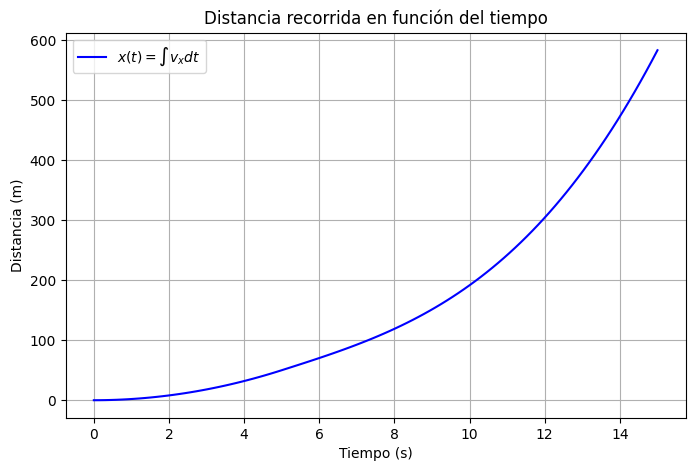

Trabajo realizado W = 116666.67 J


In [41]:
def vx(t):
    return np.piecewise(t, [t <= 5, (t > 5) & (t <= 15)],
                         [lambda t: 4*t, lambda t: 20 + (5 - t)**2])
def x_t(t):
    return spi.quad(vx, 0, t)[0] #integral de la velocidad = pocision

# puntos para la gráfica
t_vals = np.linspace(0, 15, 100)
x_vals = np.array([x_t(t) for t in t_vals])

# Grafica x(t)
plt.figure(figsize=(8, 5))
plt.plot(t_vals, x_vals, label=r"$x(t) = \int v_x dt$", color='b')
plt.xlabel("Tiempo (s)")
plt.ylabel("Distancia (m)")
plt.title("Distancia recorrida en función del tiempo")
plt.legend()
plt.grid()
plt.show()

# Calcular el trabajo con F_x = 200 N
d_total = x_t(15)  # Distancia total recorrida
F_x = 200
W = F_x * d_total

print(f"Trabajo realizado W = {W:.2f} J")


#3
La cantidad de masa transportada por una tuberia durante un periodo se puede calcular como

$$M = \int_{t_1}^{t_2} Q(t) c(t) \; dt$$

siendo M (masa en mg), $Q(t)$ el caudal y $c(t)$ concentración (mg/m$^3$). Sean las siguientes representaciones funcionales:

$$Q(t) = 9 + 5 \cos^2 (0.4t)$$
$$c(t) = 5e^{-0.5 t} + 2 e^{0.15 t}$$

Determine la masa transportada entre $t_1 = 2$ y $t_2 = 8 \mbox{ min}$ usando:

* Haga un gráfico del flujo y la concentración en función del tiempo.
* Determine el valor de la integral usando el método de integración de Romberg
* Compruebe sus resultado usando el método de cuadratura Gaussiana adaptativa `quad`.


In [ ]:
#Aquí va su código

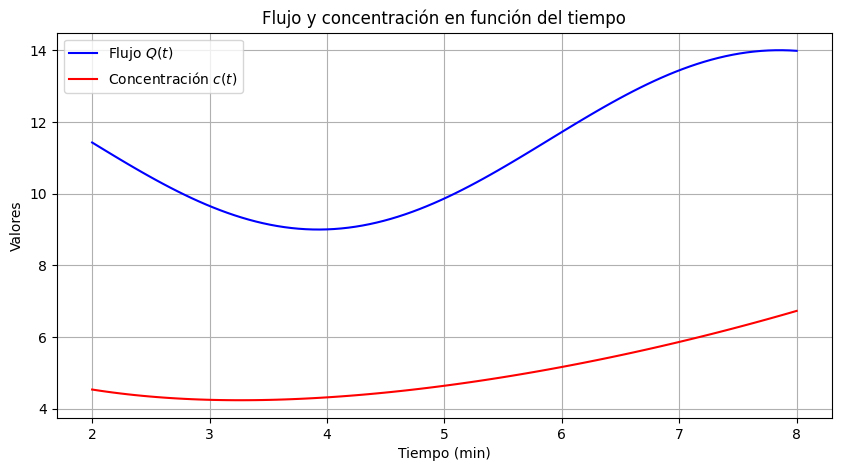

Masa transportada (Romberg): 335.9625 mg
Masa transportada (Quad): 335.9625 mg, con error estimado 3.73e-12 mg


<ipython-input-46-e1bfe1c1307c>:32: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  M_romberg = spi.romberg(integrand, t1, t2)


In [46]:

# Q(t) y c(t)
def Q(t):
    return 9 + 5 * np.cos(0.4*t)**2

def c(t):
    return 5*np.exp(-0.5*t) + 2*np.exp(0.15*t)

# Q(t) * c(t) para la integral
def integrand(t):
    return Q(t) * c(t)

# Rango de t
t1, t2 = 2, 8
t_vals = np.linspace(t1, t2, 100)

#valores para la gráfica
Q_vals = Q(t_vals)
c_vals = c(t_vals)

# Graficar Q(t) y c(t)
plt.figure(figsize=(10, 5))
plt.plot(t_vals, Q_vals, label="Flujo $Q(t)$", color="b")
plt.plot(t_vals, c_vals, label="Concentración $c(t)$", color="r")
plt.xlabel("Tiempo (min)")
plt.ylabel("Valores")
plt.title("Flujo y concentración en función del tiempo")
plt.legend()
plt.grid()
plt.show()

# Método de integración de Romberg
M_romberg = spi.romberg(integrand, t1, t2)

# Método de cuadratura gaussiana adaptativa (quad)
M_quad, error = spi.quad(integrand, t1, t2)

# Mostrar resultados
print(f"Masa transportada (Romberg): {M_romberg:.4f} mg")
print(f"Masa transportada (Quad): {M_quad:.4f} mg, con error estimado {error:.2e} mg")


#4
Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequeñas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

In [45]:
import scipy.special as sps

#datos iniciales
I0 = 1.0  # Momento de inercia (kg*m²)
m = 1.0   # Masa (kg)
g = 9.81  # Gravedad (m/s²)
b = 1.0   # Longitud desde el pivote al centro de masa (m)
theta0 = np.pi / 4  # Amplitud inicial (radianes)

# P osc. pequeñas
P0 = 2 * np.pi * np.sqrt(I0 / (m * g * b))

# k para la int elíptica
k = np.sin(theta0 / 2)

# integral
def integrando(phi):
    return 1 / np.sqrt(1 - k**2 * np.sin(phi)**2)

# Calcular la integral usando cuadratura gaussiana adaptativa
integral_value, error = spi.quad(integrando, 0, np.pi/2)

# Calcular el P de oscilación
P = (2 * P0 / np.pi) * integral_value

# Comparar con la función especial de SciPy de integral eliptica
P_exact = (2 * P0 / np.pi) * sps.ellipk(k**2)

# Mostrar resultados
print(f"Periodo usando integración numérica: {P:.6f} s")
print(f"Periodo usando función exacta (ellipk): {P_exact:.6f} s")
print(f"Error estimado de la integración numérica: {error:.2e}")


Periodo usando integración numérica: 2.086256 s
Periodo usando función exacta (ellipk): 2.086256 s
Error estimado de la integración numérica: 1.81e-14


#5
El departamento de transporte encuentra que la tasa a la cual los autos cruzan un puente puede ser aproximada por la función:



$$ f(t) = \frac{22.8}{3.5 + 7(t - 1.25)^4} $$



donde $t = 0 $ a las 4 pm, y se mide en horas, y $ f(t) $ se mide en autos por minuto. Estima el número total de autos que cruzan el puente entre las 4 y las 6 pm. Asegúrate de que tu estimación tenga un error menor al 5% y proporciona evidencia matemática suficiente de tu estimación de error.


In [43]:
#f(t)
def f(t):
    return 22.8 / (3.5 + 7 * (t - 1.25)**4)

# Intervalo de integración, o sea, el tiempo (4:00 p.m. a 6:00 p.m. → t = 0 a t = 2 en horas)
t_min, t_max = 0, 2

# Calcular la integral (número total de autos)
autos_total, error = spi.quad(f, t_min, t_max)

# Convertir autos por min a autos por hora
autos_total *= 60  # Porque f(t) está en autos/minuto

#porcentaje de error relativo
error_relativo = (error * 60 / autos_total) * 100

#.       resultados
print(f"Número total estimado de autos: {autos_total:.2f}")
print(f"Error absoluto de la estimación: {error * 60:.10f} autos")
print(f"Error relativo: {error_relativo:.10f}%")

if error_relativo < 5:
    print("✅ La estimación es válida, el error es menor al 5%.") #CON EMOJIS PARA HACERLO MAS BONITO
else:
    print("❌ La estimación NO cumple con el criterio de error (<5%).")

Número total estimado de autos: 599.51
Error absoluto de la estimación: 0.0000000174 autos
Error relativo: 0.0000000029%
✅ La estimación es válida, el error es menor al 5%.


#6
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo. Para $a$ = 1, $I$ = 3, y $μ0∕4π$ = 1, calcular y graficar:

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r



A



<ipython-input-44-f4a7e7d9f2ff>:17: RuntimeWarning: invalid value encountered in scalar divide
  factor = ((2 - k2) * K_k - 2 * E_k) / k2


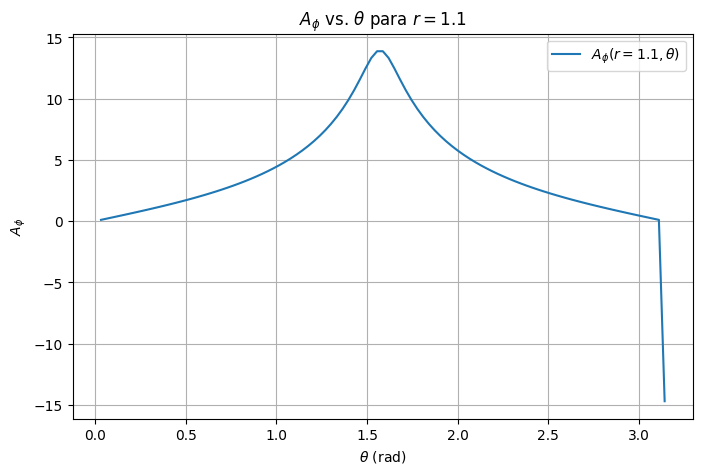


B



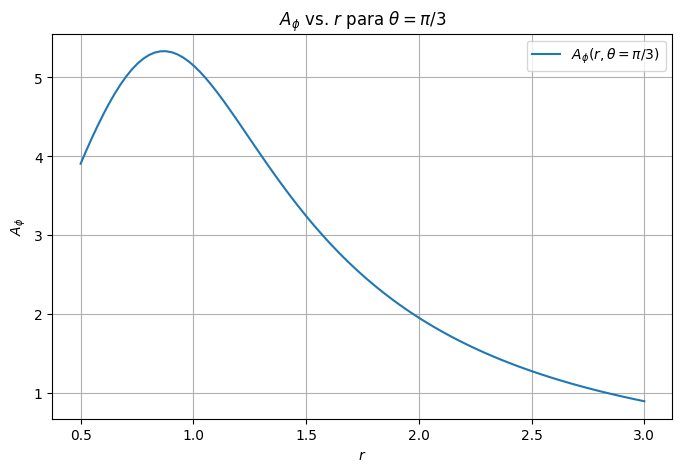

In [44]:

from scipy.special import ellipk, ellipe

a = 1  # Radio del lazo de corriente
I = 3  # Corriente en el lazo
mu_0_4pi = 1  # Se da en el problema

def A_phi(r, theta):
    k2 = (4 * a * r * np.sin(theta)) / (a**2 + r**2 + 2 * a * r * np.sin(theta))
    k = np.sqrt(k2)  # k es la raíz cuadrada de k^2

    #integrales elípticas completas
    K_k = ellipk(k2)
    E_k = ellipe(k2)

    # A_phi(r, theta)
    coef = (4 * I * a) / np.sqrt(a**2 + r**2 + 2 * a * r * np.sin(theta))
    factor = ((2 - k2) * K_k - 2 * E_k) / k2
    return mu_0_4pi * coef * factor

#a) A_phi(r=1.1, θ) vs. θ
print('\nA\n')
theta_vals = np.linspace(0, np.pi, 100)  # θ de 0 a π
A_theta = [A_phi(1.1, theta) for theta in theta_vals]

plt.figure(figsize=(8, 5))
plt.plot(theta_vals, A_theta, label=r"$A_\phi(r=1.1, \theta)$")
plt.xlabel(r"$\theta$ (rad)")
plt.ylabel(r"$A_\phi$")
plt.title(r"$A_\phi$ vs. $\theta$ para $r=1.1$")
plt.legend()
plt.grid()
plt.show()

#b) A_phi(r, θ=π/3) vs. r
print('\nB\n')
r_vals = np.linspace(0.5, 3, 100)  # r de 0.5 a 3
A_r = [A_phi(r, np.pi/3) for r in r_vals]

plt.figure(figsize=(8, 5))
plt.plot(r_vals, A_r, label=r"$A_\phi(r, \theta=\pi/3)$")
plt.xlabel(r"$r$")
plt.ylabel(r"$A_\phi$")
plt.title(r"$A_\phi$ vs. $r$ para $\theta=\pi/3$")
plt.legend()
plt.grid()
plt.show()
